<h1>Constructing K-Means Algorithm From Scratch</h1>
<code>by Marc Arvie V. Talavera</code>

In this notebook, I try to create an algorithm for k-means clustering from scratch using Numpy library.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Try to generate data
dist1 = np.random.multivariate_normal([1, 2], [[1, 0], [0, 1]], 500)
dist2 = np.random.multivariate_normal([5, 7], [[2, 0], [0, 5]], 500)

# Append the data in one array
data = []
for i in dist1:
  data.append(i)
for i in dist2:
  data.append(i)

# Transform into an array
data = np.array(data)

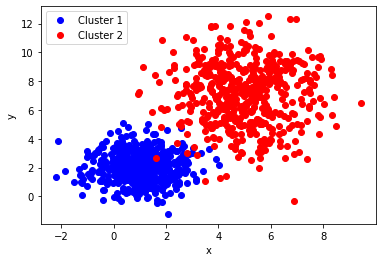

In [14]:
# Visualize data
plt.plot(dist1[:, 0], dist1[:, 1], "bo", label = "Cluster 1")
plt.plot(dist2[:, 0], dist2[:, 1], "ro", label = "Cluster 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

From the data above, there are originally two clusters generated from two 2D Gaussian distributions. The goal for the next part is to perform a K-means algorithm that can cluster the given data points as shown above.

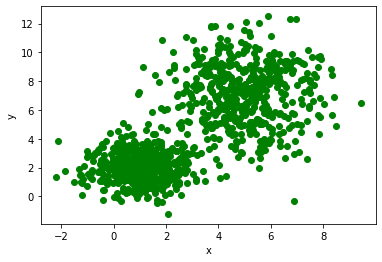

In [15]:
# Plotting the data without prior knowledge of how it is generated
plt.plot(data[:, 0], data[:, 1], "go")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Assuming that we do not have prior knowledge of how the data distribution, and we are tasked to classify them into groups, the first thing to do is to plot the data points. From the plot above, we see that there could possibly be two clusters separated by the line as follows:

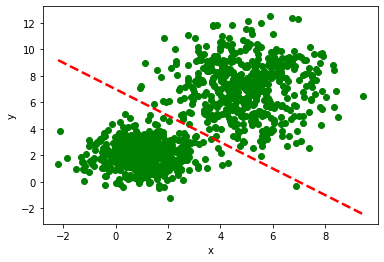

In [29]:
# Plotting the data without prior knowledge of how it is generated
range_ = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
plt.plot(data[:, 0], data[:, 1], "go")
plt.plot(range_, - range_ + 7, "r--", linewidth = 2.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [72]:
# Time to perform the algorithm

# Set the number of clusters
k = 2

# Set number of iterations
iterations = 100

# Record efficiency of the code
fit_values = np.zeros(iterations)

# Select k random points on the dataset
indices = np.random.choice(range(0, data.shape[0]), k)

# Initialize the centroids
centroids = np.zeros((k, data.shape[1]))
centroids[:] = np.array([data[i] for i in indices])

# Create array for assigning kth cluster for each data point
assignment = np.zeros(data.shape[0])

# Initialize zeroth iteration
iter = 0

# Define Euclidean distance
def dist(array1, array2):
  dist_vector = array1 - array2
  dist_squared = np.dot(dist_vector, dist_vector)
  return np.sqrt(dist_squared)
  
# Start iterations
while iter < iterations:
  # For calculating efficiency
  efficiency_holder = np.zeros(k)

  # Calculate distances
  for index1, (point) in enumerate(data):
    distances = np.zeros(k)
    for index2, (centroid) in enumerate(centroids):
      distances[index2] = dist(point, centroid)
    
    # Determine which cluster is closest to the point
    argmin = np.argmin(distances)
    # Assign cluster
    assignment[index1] = argmin
    # Add distances of points belonging to same cluster
    efficiency_holder[argmin] += distances[argmin]**2

  # After assigning values, group them into clusters to get new centroid
  for cluster in range(0, k):
    # Determine indices of points belonging to a cluster
    cluster_indices = np.argwhere(assignment == cluster).ravel()
    cluster_group = data[cluster_indices]

    # Determine centroid of this cluster group
    centroids[cluster] = np.sum(cluster_group, axis = 0) / len(cluster_group)

  # Record efficiency for the given iteration
  fit_values[iter] = np.sum(efficiency_holder)

  # Update iter values
  iter += 1

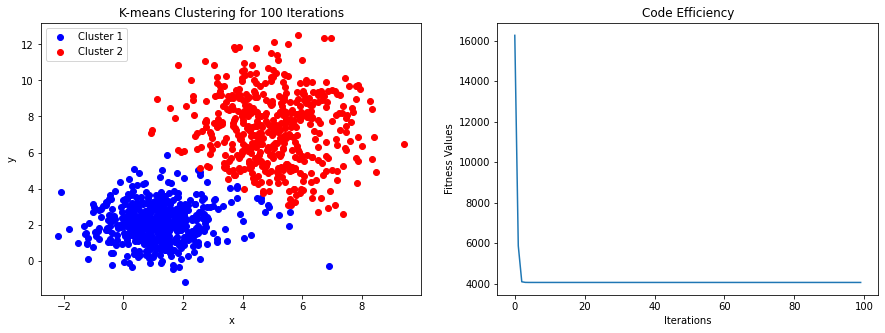

In [86]:
# Plot the result
# Cluster 1
cluster_1 = data[np.argwhere(assignment == 0).ravel()]
# Cluster 2
cluster_2 = data[np.argwhere(assignment == 1).ravel()]

# Plot
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
# Cluster 1 plot
ax[0].plot(cluster_1[:, 0], cluster_1[:, 1], "bo", label = "Cluster 1")
# Cluster 2 plot
ax[0].plot(cluster_2[:, 0], cluster_2[:, 1], "ro", label = "Cluster 2")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("K-means Clustering for {} Iterations".format(iterations))
ax[0].legend()
# Efficiency
ax[1].plot(range(0, iterations), fit_values)
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Fitness Values")
ax[1].set_title("Code Efficiency")
plt.show()

<h2>Conclusion</h2>

From the plots above, the algorithm is successful in separating the dataset into the desired clusters. However, from the a priori knowledge of the dataset, there are overlaps, meaning there are datapoints from the <font color = red><b> red </b><font color = black> cluster that are mixed up with those from the <font color = blue><b> blue </b><font color = black>. It can be inferred that k-means clustering strictly divide data points into regions without allowing any overlap. For such cases, other clustering method could be advised to use.

It should also be noted that for less than 20 iterations, the fitness value, or the function to be optimized to achieve the ideal clustering, has already converged to some finite value. This means that <font color = red> it is not necessary to perform more than the enough number of iterations to achieve convergence to optimal value <font color = black>. Hence, the goal is to <font color = blue><b>devise an algorithm that stops when the fitness value has reached the optimum</b><font color = black>. Likewise, <font color = blue><b>try changing the values of k to see what happens to the fitness value</b><font color = black>.